In [17]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

from mlxtend.frequent_patterns import apriori, association_rules

from utils import outliers_control

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [18]:
# Cargamos el dataset
df = pd.read_csv('test_case_v1.csv')

# Verificamos que se haya cargado correctamente observando las primeras filas
df.head()

,date,salesforce_contact_id,contact_created_date,is_free_trial_user__c,is_diplomado_user__c,first_primary_diplomado_id_fixed,first_primary_diplomado_name_fixed,first_primary_diplomado_school_fixed,moodle_course_id,moodle_course_name,school,count_orientation_attended,count_lessons,count_liveclass_attendee,count_evaluation_submitted,count_ep_submited,end_license_date,is_graduated
0,2024-03-09,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,907,Manicure: diseño profesional de uñas,Belleza,0,0,0,0,0,2023-01-06 17:15:48.000,0
1,2024-02-11,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,0,0,0,0,0,2023-01-06 17:15:48.000,0
2,2024-03-17,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,0,0,0,0,0,2023-01-06 17:15:48.000,0
3,2024-03-17,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,907,Manicure: diseño profesional de uñas,Belleza,0,0,0,0,0,2023-01-06 17:15:48.000,0
4,2024-02-11,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,907,Manicure: diseño profesional de uñas,Belleza,0,0,0,0,0,2023-01-06 17:15:48.000,0


# *Data Cleaning and Preparation*

In [19]:
# Analizamos el tamanio del df
df.shape

(3915953, 18)

In [20]:
# Nos traemos info general del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3915953 entries, 0 to 3915952
Data columns (total 18 columns):
 #   Column                                Dtype 
---  ------                                ----- 
 0   date                                  object
 1   salesforce_contact_id                 object
 2   contact_created_date                  object
 3   is_free_trial_user__c                 bool  
 4   is_diplomado_user__c                  bool  
 5   first_primary_diplomado_id_fixed      int64 
 6   first_primary_diplomado_name_fixed    object
 7   first_primary_diplomado_school_fixed  object
 8   moodle_course_id                      int64 
 9   moodle_course_name                    object
 10  school                                object
 11  count_orientation_attended            int64 
 12  count_lessons                         int64 
 13  count_liveclass_attendee              int64 
 14  count_evaluation_submitted            int64 
 15  count_ep_submited               

In [21]:
# Describimos el df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
first_primary_diplomado_id_fixed,3915953.0,960.785098,60.321774,907.0,907.0,926.0,991.0,1073.0
moodle_course_id,3915953.0,961.518252,60.140035,907.0,907.0,926.0,991.0,1073.0
count_orientation_attended,3915953.0,0.002177,0.047573,0.0,0.0,0.0,0.0,3.0
count_lessons,3915953.0,0.505354,4.764042,0.0,0.0,0.0,0.0,577.0
count_liveclass_attendee,3915953.0,0.008688,0.110072,0.0,0.0,0.0,0.0,6.0
count_evaluation_submitted,3915953.0,0.011551,0.163047,0.0,0.0,0.0,0.0,24.0
count_ep_submited,3915953.0,0.002947,0.080425,0.0,0.0,0.0,0.0,17.0
is_graduated,3915953.0,0.090249,0.286538,0.0,0.0,0.0,0.0,1.0


In [22]:
# Verificamos la cantidad de valores nulos para cada variable
print('Missing values:')
df.isna().sum().T

Missing values:


date                                    0
salesforce_contact_id                   0
contact_created_date                    0
is_free_trial_user__c                   0
is_diplomado_user__c                    0
first_primary_diplomado_id_fixed        0
first_primary_diplomado_name_fixed      0
first_primary_diplomado_school_fixed    0
moodle_course_id                        0
moodle_course_name                      0
school                                  0
count_orientation_attended              0
count_lessons                           0
count_liveclass_attendee                0
count_evaluation_submitted              0
count_ep_submited                       0
end_license_date                        0
is_graduated                            0
dtype: int64

In [23]:
# Filtramos a los usuarios por aquellos que cuentan con licencia activa en el períoso analizado
print(f'''El tamaño del df antes del filtro es: {df.shape}''')
df['active_user'] = df.date.min() < df.end_license_date
df = df.loc[df['active_user'] == True]
print(f'''El tamaño del df después del filtro es: {df.shape}''')

El tamaño del df antes del filtro es: (3915953, 18)
El tamaño del df después del filtro es: (2823508, 19)


In [24]:
# Verificamos el tamaño del df antes de la limpieza
print(f'''El tamaño del df antes de la limpieza es: {df.shape}''')
# Eliminamos valores faltantes
df.dropna(inplace = True) # No hay valores nulos o faltantes
print(f'''El tamaño del df luego de eliminar nulls es: {df.shape}''')
# Eliminamos outliers
df = outliers_control(df, id_col = 'salesforce_contact_id' , method = 'isolation_forest', contamination = 0.01)
print(f'''El tamaño del df luego de eliminar outliers es: {df.shape}''')

El tamaño del df antes de la limpieza es: (2823508, 19)
El tamaño del df luego de eliminar nulls es: (2823508, 19)
El tamaño del df luego de eliminar outliers es: (2229623, 19)


In [25]:
# transformamos los datos necesarios
df['date'] = pd.to_datetime(df['date'])
df['contact_created_date'] = pd.to_datetime(df['contact_created_date'])

# Crear nuevas features a partir de Date
df['week'] = df['date'].dt.isocalendar().week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_week'] = df['date'].dt.strftime('%Y-%U')

# Calcular antigüedad de usuarios en días
df['difference_in_days'] = (df['date'] - df['contact_created_date']).dt.days
# Convertir la diferencia de días a semanas
df['difference_in_weeks'] = df['difference_in_days'] / 7
# Reondeamos las semanas
df['difference_in_weeks'] = df['difference_in_weeks'].round()

# *Data Analysis*

Data Discovery

In [26]:
df.head()

,date,salesforce_contact_id,contact_created_date,is_free_trial_user__c,is_diplomado_user__c,first_primary_diplomado_id_fixed,first_primary_diplomado_name_fixed,first_primary_diplomado_school_fixed,moodle_course_id,moodle_course_name,...,count_ep_submited,end_license_date,is_graduated,active_user,week,year,month,year_week,difference_in_days,difference_in_weeks
71981,2024-03-21,0035G00002c9kIOQAY,2023-01-31 14:09:36,False,True,991,Cuidado del Adulto Mayor,Bienestar,991,Cuidado del Adulto Mayor,...,0,2024-01-31 14:09:36.000,1,True,12,2024,3,2024-11,414,59.0
71982,2024-02-27,0035G00002c9kIOQAY,2023-01-31 14:09:36,False,True,991,Cuidado del Adulto Mayor,Bienestar,991,Cuidado del Adulto Mayor,...,0,2024-01-31 14:09:36.000,1,True,9,2024,2,2024-08,391,56.0
71983,2024-01-17,0035G00002c9kIOQAY,2023-01-31 14:09:36,False,True,991,Cuidado del Adulto Mayor,Bienestar,991,Cuidado del Adulto Mayor,...,0,2024-01-31 14:09:36.000,1,True,3,2024,1,2024-02,350,50.0
71984,2024-01-09,0035G00002c9kIOQAY,2023-01-31 14:09:36,False,True,991,Cuidado del Adulto Mayor,Bienestar,991,Cuidado del Adulto Mayor,...,0,2024-01-31 14:09:36.000,1,True,2,2024,1,2024-01,342,49.0
71985,2024-01-05,0035G00002c9kIOQAY,2023-01-31 14:09:36,False,True,991,Cuidado del Adulto Mayor,Bienestar,991,Cuidado del Adulto Mayor,...,0,2024-01-31 14:09:36.000,1,True,1,2024,1,2024-00,338,48.0


In [27]:
df.columns

Index(['date', 'salesforce_contact_id', 'contact_created_date',
       'is_free_trial_user__c', 'is_diplomado_user__c',
       'first_primary_diplomado_id_fixed',
       'first_primary_diplomado_name_fixed',
       'first_primary_diplomado_school_fixed', 'moodle_course_id',
       'moodle_course_name', 'school', 'count_orientation_attended',
       'count_lessons', 'count_liveclass_attendee',
       'count_evaluation_submitted', 'count_ep_submited', 'end_license_date',
       'is_graduated', 'active_user', 'week', 'year', 'month', 'year_week',
       'difference_in_days', 'difference_in_weeks'],
      dtype='object')

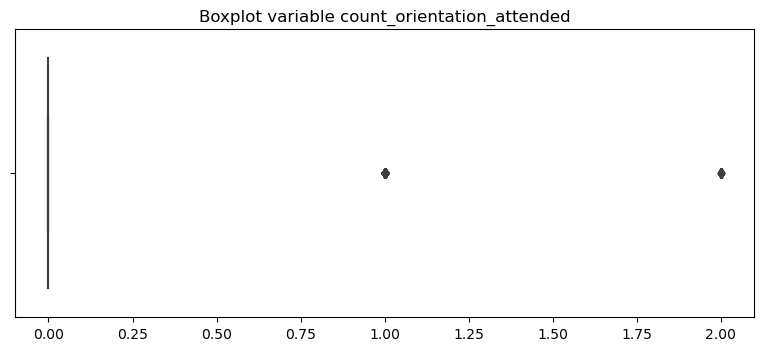

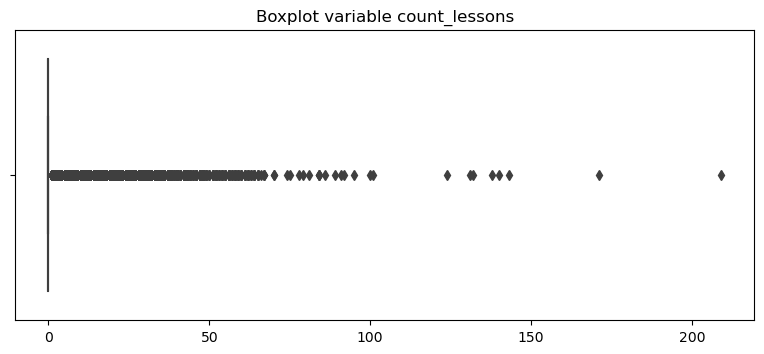

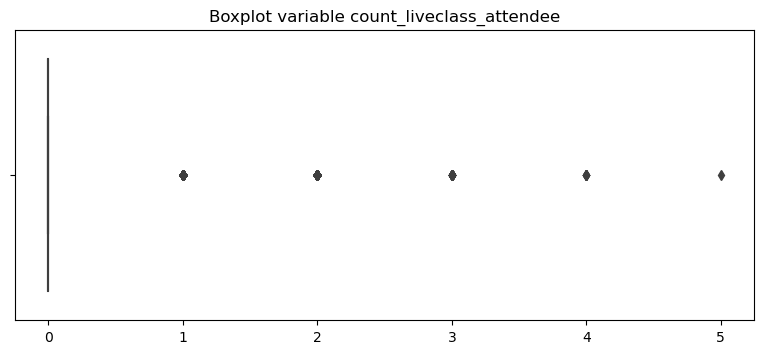

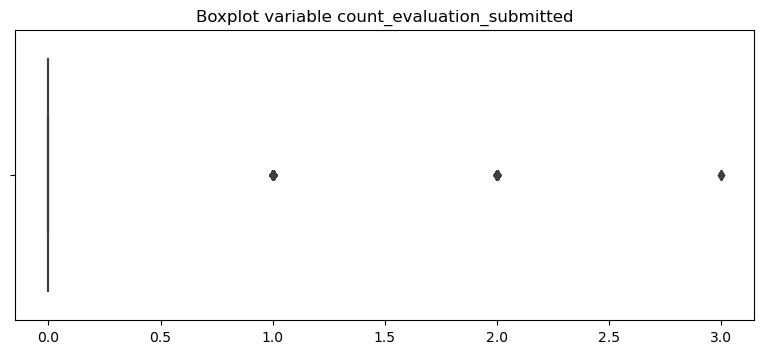

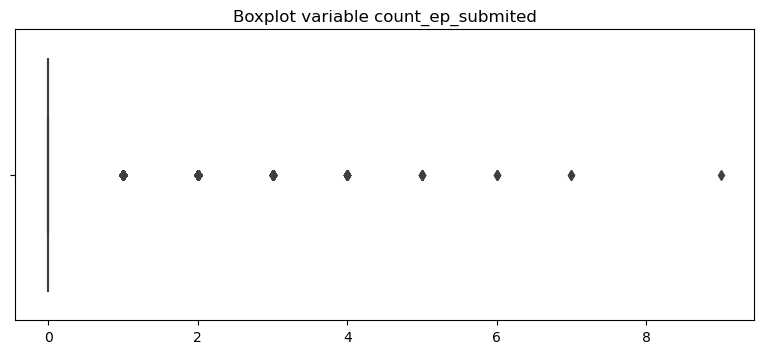

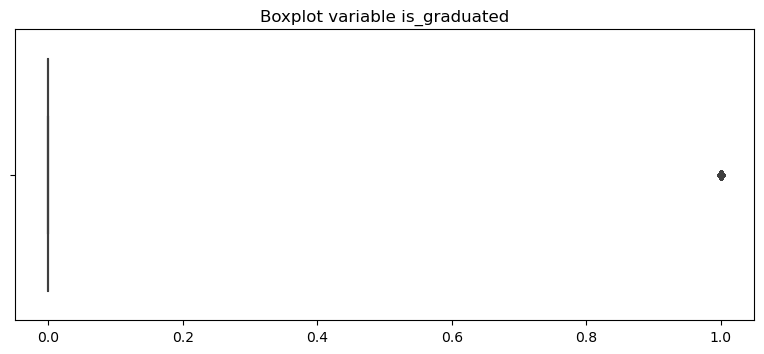

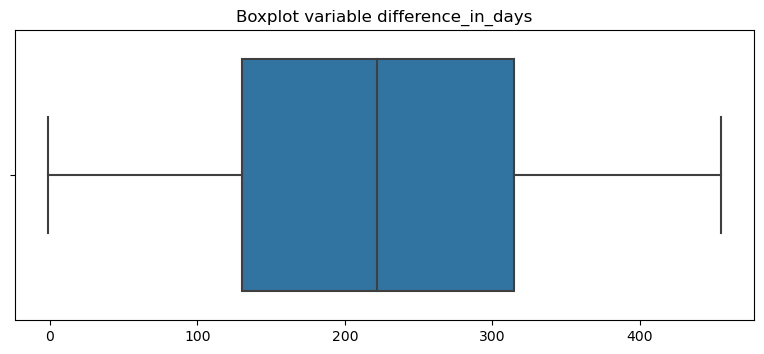

In [28]:
# Graficamos boxplots para las variables numéricas
numeric_columns = df.select_dtypes(include='int64').drop(columns = ['first_primary_diplomado_id_fixed', 'moodle_course_id']).columns
# Crear un boxplot para cada variable numérica
for i, column in enumerate(numeric_columns, 1):
    plt.figure(figsize = (8, 24))
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data = df.select_dtypes(include = 'int64'), x = column, orient = 'v')
    plt.title(f'Boxplot variable {column}')
    plt.xlabel('')
    plt.tight_layout(pad = 2.0)

In [29]:
df.columns

Index(['date', 'salesforce_contact_id', 'contact_created_date',
       'is_free_trial_user__c', 'is_diplomado_user__c',
       'first_primary_diplomado_id_fixed',
       'first_primary_diplomado_name_fixed',
       'first_primary_diplomado_school_fixed', 'moodle_course_id',
       'moodle_course_name', 'school', 'count_orientation_attended',
       'count_lessons', 'count_liveclass_attendee',
       'count_evaluation_submitted', 'count_ep_submited', 'end_license_date',
       'is_graduated', 'active_user', 'week', 'year', 'month', 'year_week',
       'difference_in_days', 'difference_in_weeks'],
      dtype='object')

Mediana de antiguedad: difference_in_weeks    35.0
dtype: float64
<----------------->
Antiguedad promedio: difference_in_weeks    34.330319
dtype: float64
<----------------->
Antiguedad promedio: difference_in_weeks    65.0
dtype: float64
<----------------->
Antiguedad promedio: difference_in_weeks   -0.0
dtype: float64
<----------------->


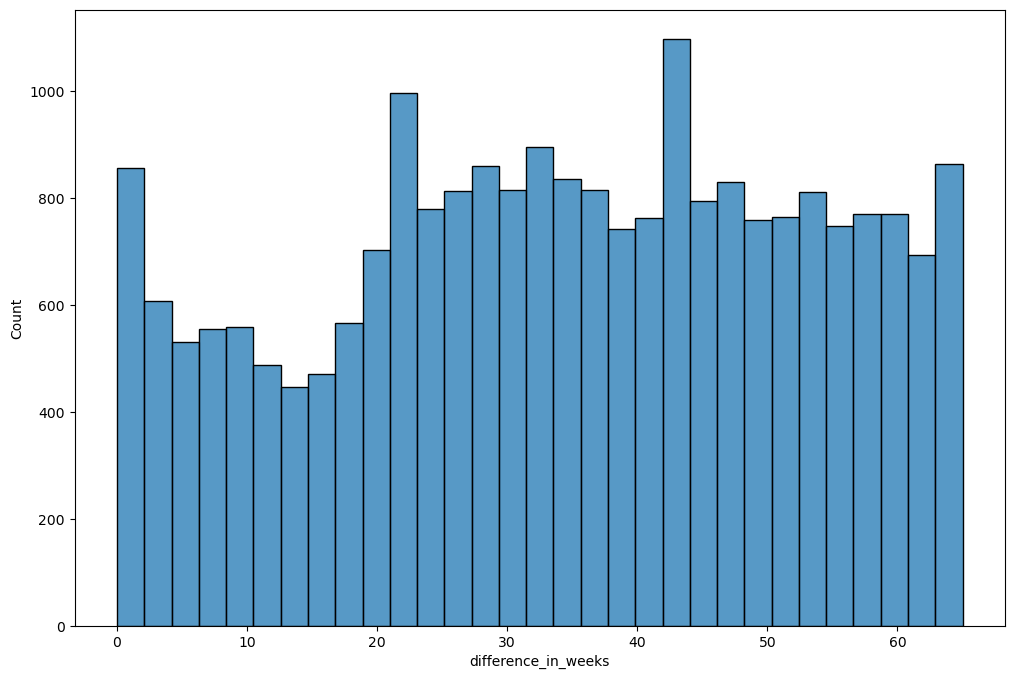

In [30]:
print(f'''Mediana de antiguedad: {df.groupby('salesforce_contact_id').agg({'difference_in_weeks' : 'max'}).median()}''')
print(f'''<----------------->''')
print(f'''Antiguedad promedio: {df.groupby('salesforce_contact_id').agg({'difference_in_weeks' : 'max'}).mean()}''')
print(f'''<----------------->''')
print(f'''Antiguedad promedio: {df.groupby('salesforce_contact_id').agg({'difference_in_weeks' : 'max'}).max()}''')
print(f'''<----------------->''')
print(f'''Antiguedad promedio: {df.groupby('salesforce_contact_id').agg({'difference_in_weeks' : 'max'}).min()}''')
print(f'''<----------------->''')
fig, ax = plt.subplots(figsize = (12, 8))
sns.histplot(data = df.groupby('salesforce_contact_id').agg({'difference_in_weeks' : 'max'}), x = 'difference_in_weeks', )
plt.show()

Hay un total de 23002 alumnos diferentes


,moodle_course_name,salesforce_contact_id,proportional_value
4,Manicure: diseño profesional de uñas,8888,0.333709
2,Cuidado del Adulto Mayor,5635,0.211572
1,Cosmetología facial y corporal,5613,0.210746
3,Inteligencia Emocional y Psicología Positiva,3963,0.148795
0,Child Care,2535,0.095179


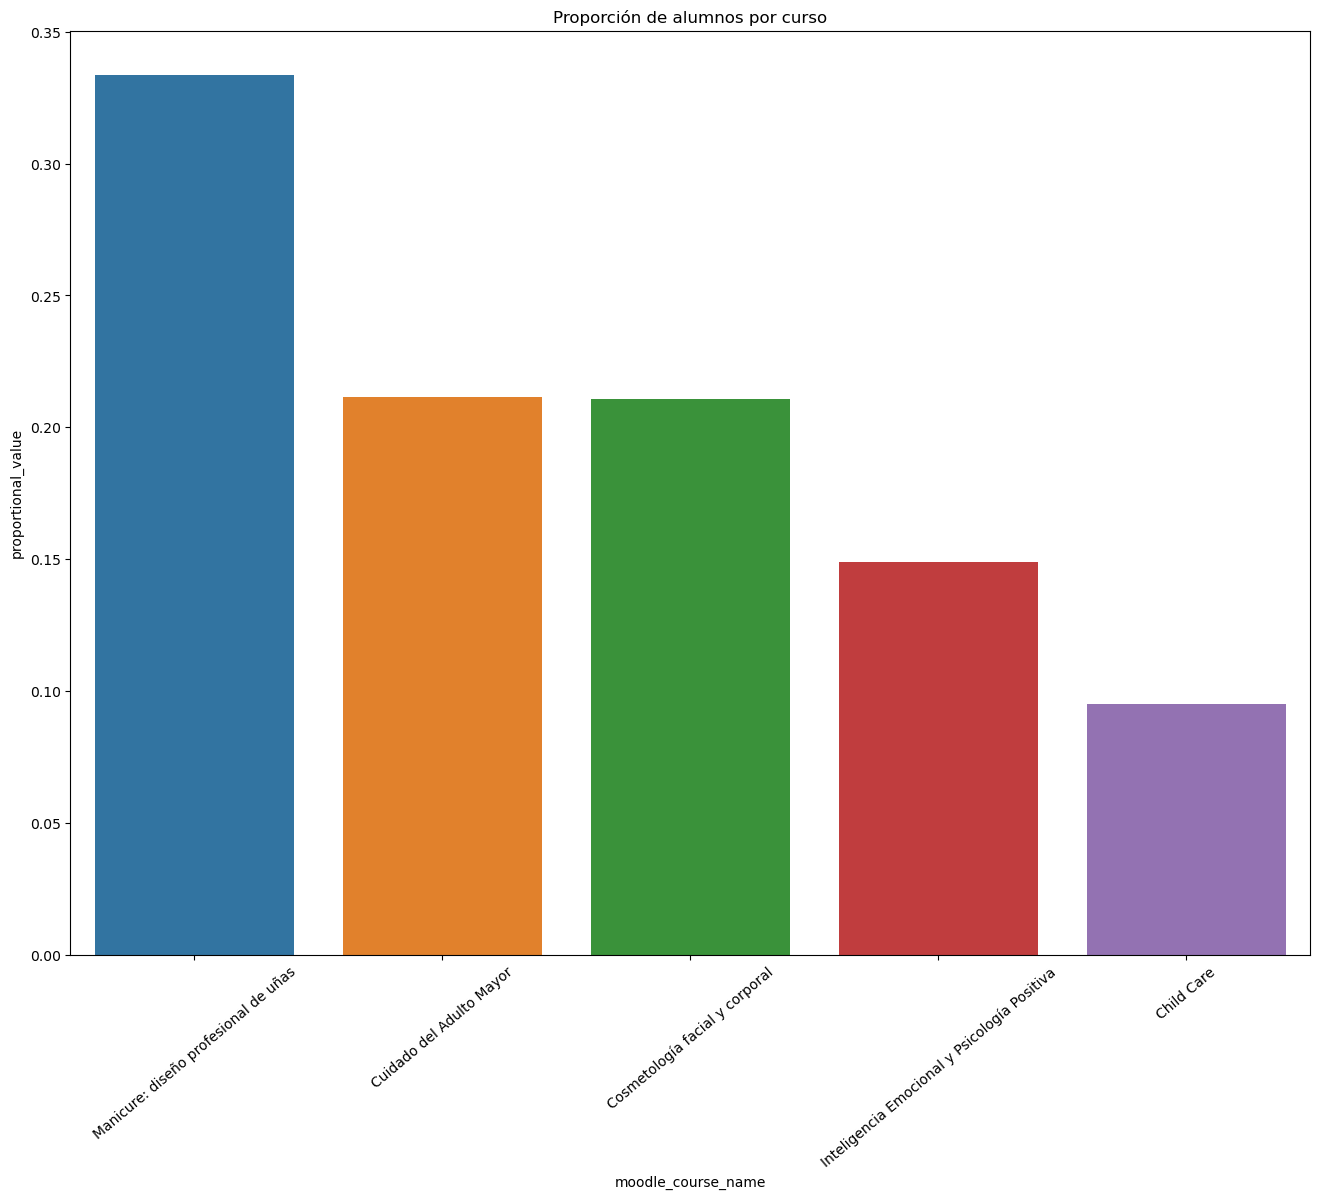

In [31]:
# Imprimimos el total de alumnos
print(f'''Hay un total de {len(df['salesforce_contact_id'].unique())} alumnos diferentes''')
# Agrupamos y contamos la cantidd de personas en cada curso
grouped_df_count = df.groupby('moodle_course_name')['salesforce_contact_id'].nunique().reset_index()
# Agregamos el valor proporcional de cada curso
grouped_df_count['proportional_value'] = grouped_df_count['salesforce_contact_id'] / grouped_df_count['salesforce_contact_id'].sum()
grouped_df_count.sort_values(by = 'proportional_value', ascending = False, inplace = True)
# graficamos la relación
fig, ax = plt.subplots(figsize = (16, 12))
sns.barplot(data = grouped_df_count, x = 'moodle_course_name', y = 'proportional_value')
plt.xticks(rotation = 40)
plt.title('Proporción de alumnos por curso')
# Imprimimos la tabla
grouped_df_count

In [32]:
# Agrupamos y contamos la cantidd de personas en cada curso
graduated_df_count = df.groupby(['salesforce_contact_id', 'moodle_course_name'], as_index = False).agg({'is_graduated' : 'max'})
graduated_df_count.groupby('moodle_course_name', as_index = False).agg({'is_graduated' : np.mean})

,moodle_course_name,is_graduated
0,Child Care,0.137673
1,Cosmetología facial y corporal,0.046321
2,Cuidado del Adulto Mayor,0.241526
3,Inteligencia Emocional y Psicología Positiva,0.152662
4,Manicure: diseño profesional de uñas,0.103060


In [33]:
# Agrupamos y contamos la cantidd de personas en cada curso
df.groupby(['salesforce_contact_id']).agg({'is_graduated' : 'max'}).mean()

is_graduated    0.146292
dtype: float64

In [34]:
unique_courses_count = df.groupby('salesforce_contact_id')['moodle_course_name'].nunique().reset_index()
unique_courses_count.loc[unique_courses_count['moodle_course_name'] == 1, 'moodle_course_name'] = 0
unique_courses_count.loc[unique_courses_count['moodle_course_name'] >= 1, 'moodle_course_name'] = 1
unique_courses_count['moodle_course_name'].mean()

0.1492913659681767

In [35]:
# Agrupamos y contamos la cantidd de personas en cada curso
grouped_df_count = df.groupby(['moodle_course_name', 'is_diplomado_user__c'])['salesforce_contact_id'].nunique().reset_index()
print(f'''
    El {round(sum(grouped_df_count[grouped_df_count['is_diplomado_user__c'] == True]['salesforce_contact_id'])/sum(grouped_df_count['salesforce_contact_id']) * 100, 2)}% de los usuarios pagaron por sus cursos
''')
grouped_df_count.pivot(index = 'moodle_course_name', columns = 'is_diplomado_user__c', values = 'salesforce_contact_id').fillna(0)


    El 99.64% de los usuarios pagaron por sus cursos



is_diplomado_user__c,False,True
moodle_course_name,,
Child Care,0.0,2535.0
Cosmetología facial y corporal,27.0,5587.0
Cuidado del Adulto Mayor,0.0,5635.0
Inteligencia Emocional y Psicología Positiva,32.0,3931.0
Manicure: diseño profesional de uñas,38.0,8850.0


In [36]:
# Agrupamos y contamos la cantidad de personas en cada curso Según Asistencia a clases de orientación
grouped_df_count = df.groupby(['moodle_course_name', 'count_orientation_attended'])['salesforce_contact_id'].nunique().reset_index()
grouped_df_count.pivot(index = 'moodle_course_name', columns = 'count_orientation_attended', values = 'salesforce_contact_id').fillna(0)

count_orientation_attended,0,1,2
moodle_course_name,,,
Child Care,2533.0,96.0,0.0
Cosmetología facial y corporal,5613.0,385.0,5.0
Cuidado del Adulto Mayor,5631.0,226.0,1.0
Inteligencia Emocional y Psicología Positiva,3962.0,195.0,2.0
Manicure: diseño profesional de uñas,8884.0,356.0,8.0


# *Data Engagement*

LEARNING RATE

In [37]:
# weekly learning users rate
# Deifninmos un usuario activo en una semana como un usuarios que cumpla con alguna de las condicinoes siguientes:
df['learning_rate'] = (df['count_orientation_attended'] +
                       df['count_lessons'] +
                       df['count_liveclass_attendee'] +
                       df['count_evaluation_submitted'] +
                       df['count_ep_submited'])
# Convertimos la variable a binaria
df.loc[df['learning_rate'] >= 1, 'learning_rate'] = 1
df.loc[df['learning_rate'] != 1, 'learning_rate'] = 0
# Agrupamos los valores
grouped_weekly = df[df['contact_created_date'] >= df['date'].min()].groupby(['year_week', 'salesforce_contact_id'], as_index = False).agg({'learning_rate' : 'max'})
grouped_weekly = grouped_weekly.groupby('year_week', as_index = False).agg({'learning_rate' : np.mean})
grouped_weekly

,year_week,learning_rate
0,2024-00,0.441489
1,2024-01,0.558036
2,2024-02,0.437936
3,2024-03,0.356701
4,2024-04,0.328163
5,2024-05,0.254954
6,2024-06,0.256956
7,2024-07,0.225991
8,2024-08,0.206424
9,2024-09,0.215776


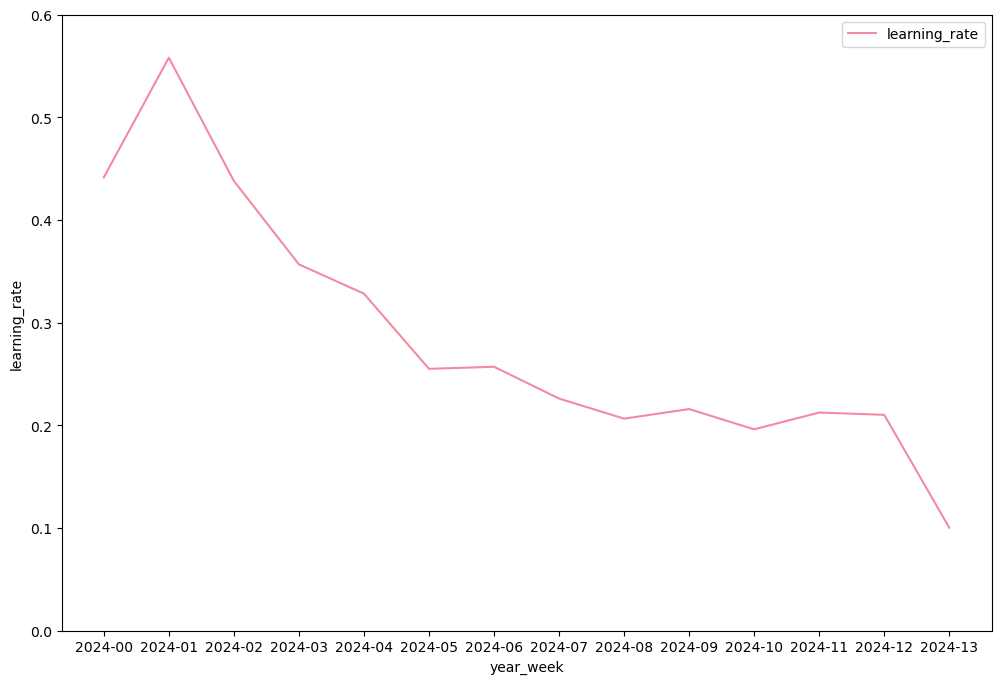

In [38]:
# Graficamos el weekley learning rate
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(data = grouped_weekly, x = 'year_week', y = 'learning_rate', color = '#F38BA0', label = 'learning_rate', )
plt.ylim(0, 0.6)
plt.show()

COHORTS

In [74]:
# filtramos para el año en curso
cohort_df = df[df['contact_created_date'] >= df['date'].min()]
# primera semana cohort
cohort_df['cohort_week'] = cohort_df['contact_created_date'].dt.strftime('%Y-%U')
# agrupamos a los usuarios por actividad semanal
weekly_new_users = cohort_df[['cohort_week', 'salesforce_contact_id']].drop_duplicates()
weekly_new_users = weekly_new_users.groupby('cohort_week', as_index = False).agg({'salesforce_contact_id' : 'count'})
weekly_new_users.rename(columns = {'salesforce_contact_id' : 'new_users'}, inplace = True)
# primera semana cohort
cohort_df['cohort_week'] = cohort_df['contact_created_date'].dt.strftime('%Y-%U')
# definimos los usuarios activos semanas a semana
cohort_df = cohort_df.groupby(['salesforce_contact_id', 'year_week', 'cohort_week'], as_index = False).agg({'learning_rate': 'max'}).reset_index()
cohort_df = cohort_df.groupby(['cohort_week', 'year_week']).agg({'learning_rate': 'sum'}).reset_index()
cohort_df = cohort_df.sort_values(by = ['cohort_week', 'year_week'], ascending = True)
# agrupamos a los usuarios por actividad semanal
weekly_new_users_max = cohort_df.groupby('cohort_week', as_index = False).agg({'learning_rate' : 'max'})
weekly_new_users_max.rename(columns = {'learning_rate' : 'max_new_users'}, inplace = True)
# mergeamos con los anteriores
cohort_df = cohort_df.merge(weekly_new_users, on = 'cohort_week')
cohort_df = cohort_df.merge(weekly_new_users_max, on = 'cohort_week')
# creamos nuevas columnas con las proporciones para cada cohort
cohort_df['total_prop'] = cohort_df['learning_rate'] / cohort_df['new_users']
cohort_df['connected_prop'] = cohort_df['learning_rate'] / cohort_df['max_new_users']

In [75]:
# Convertimos en datetime
cohort_df['cohort_week_2'] = pd.to_datetime(cohort_df['cohort_week'] + '-1', format='%Y-%W-%w')
cohort_df['year_week'] = pd.to_datetime(cohort_df['year_week'] + '-1', format='%Y-%W-%w')
# Calculamos la diferencia en semanas
cohort_df['week_diff'] = (cohort_df['year_week'] - cohort_df['cohort_week_2']).dt.days // 7
# Eliminamos duplicados
cohort_df = cohort_df.groupby(['cohort_week', 'week_diff']).mean().reset_index()

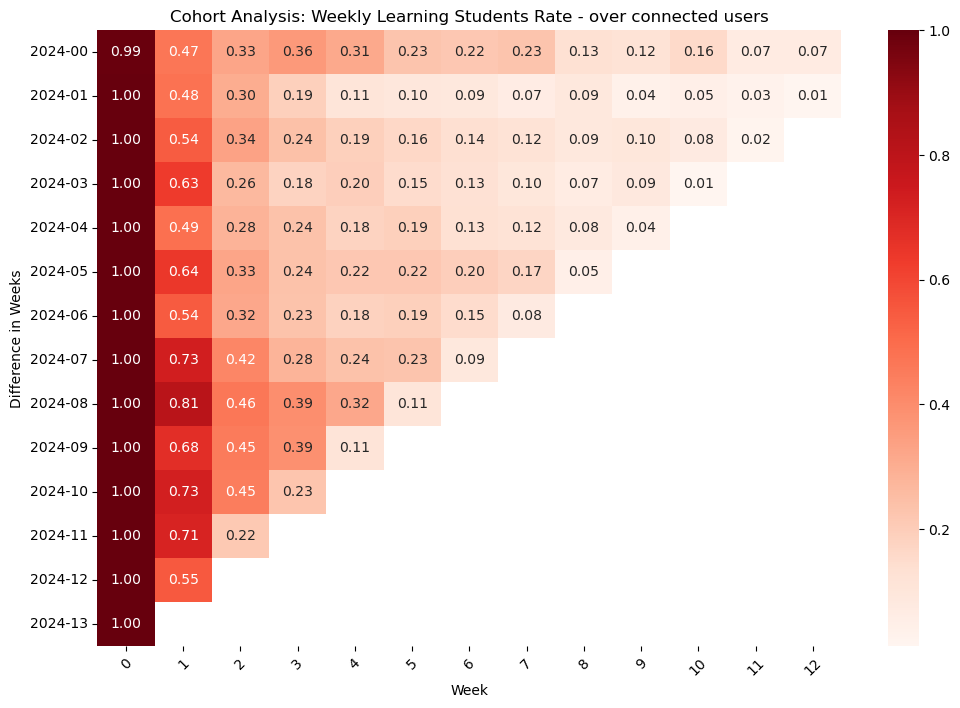

In [76]:
# pivot para invertir los valores y quedarnos sólo con los útiles
cohort_pivot = cohort_df.pivot(index = 'cohort_week', columns = 'week_diff', values = 'connected_prop')

# Crear el heatmap de cohort
plt.figure(figsize = (12, 8))
sns.heatmap(cohort_pivot, annot = True, fmt = '.2f', cmap = 'Reds', cbar = True)
plt.title('Cohort Analysis: Weekly Learning Students Rate - over connected users')
plt.xlabel('Week')
plt.ylabel('Difference in Weeks')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()

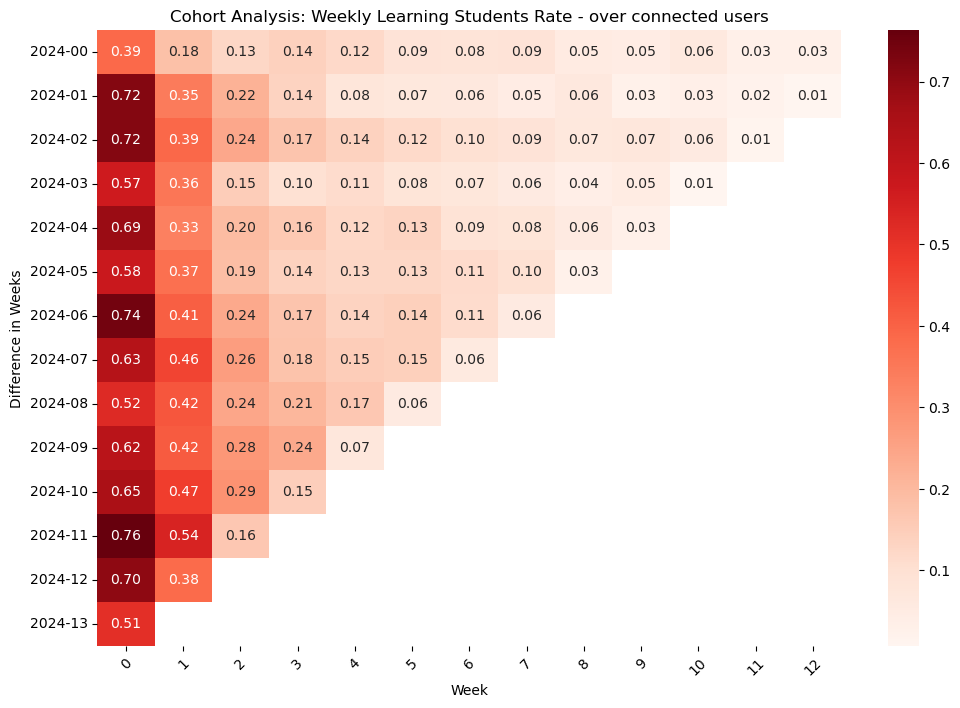

In [77]:
# pivot para invertir los valores y quedarnos sólo con los útiles
cohort_pivot = cohort_df.pivot(index = 'cohort_week', columns = 'week_diff', values = 'total_prop')

# Crear el heatmap de cohort
plt.figure(figsize = (12, 8))
sns.heatmap(cohort_pivot, annot = True, fmt = '.2f', cmap = 'Reds', cbar = True)
plt.title('Cohort Analysis: Weekly Learning Students Rate - over connected users')
plt.xlabel('Week')
plt.ylabel('Difference in Weeks')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()

In [95]:
# calculamos la cantidad de cursos por usuario
cursos_por_usuario = df[['salesforce_contact_id', 'moodle_course_name']].drop_duplicates()
cursos_por_usuario = cursos_por_usuario.groupby('salesforce_contact_id', as_index = False).agg({'moodle_course_name' : 'count'})
# calculamos la cantidad de escuelas por usuario
escuelas_por_usuario = df[['salesforce_contact_id', 'school']].drop_duplicates()
escuelas_por_usuario = escuelas_por_usuario.groupby('salesforce_contact_id', as_index = False).agg({'school' : 'count'})
# obtener dummies de variables cursos
one_hot_cursos = df[['salesforce_contact_id', 'moodle_course_name']].drop_duplicates()
one_hot_cursos = one_hot_cursos.pivot_table(index = 'salesforce_contact_id', 
                                      columns = 'moodle_course_name', 
                                      aggfunc = 'size', 
                                      fill_value = 0)
# calculamos la cantidad de escuelas por usuario
one_hot_escuelas = df[['salesforce_contact_id', 'school']].drop_duplicates()
one_hot_escuelas = one_hot_escuelas.pivot_table(index = 'salesforce_contact_id', 
                                      columns = 'school', 
                                      aggfunc = 'size', 
                                      fill_value = 0)

In [96]:
# filtramos para el año en curso y creamos un subset para trabajar con el churn
weekly_df = df[df['contact_created_date'] >= df['date'].min()]
# agregamos las variables de interés
weekly_df = weekly_df.groupby(['salesforce_contact_id', 'year_week'], as_index = False).agg({'count_orientation_attended' : 'sum',
                                                                                            'count_lessons' : 'sum', 
                                                                                            'count_liveclass_attendee' : 'sum',
                                                                                            'count_evaluation_submitted' : 'sum', 
                                                                                            'count_ep_submited' : 'sum',
                                                                                            'difference_in_days' : 'max',
                                                                                            'is_graduated' : 'max',
                                                                                            'learning_rate' : 'max'})

weekly_df.sort_values(by = ['salesforce_contact_id', 'year_week'], ascending = True, inplace = True)
# calculamos la variación semana a semana
weekly_df['diff'] = weekly_df['learning_rate'].diff()
weekly_df.fillna(0, inplace = True)
weekly_df['diff'] = weekly_df['diff'].astype('int')

# Definimos el churn semanal
weekly_df = weekly_df[~((weekly_df['learning_rate'] == 0) & (weekly_df['diff'] == 0))]
weekly_df.loc[weekly_df['diff'] == -1, 'returned'] = 1
weekly_df.loc[weekly_df['returned'].isna(), 'returned'] = 0
weekly_df['returned'] = weekly_df['returned'].astype('int')

In [97]:
# Mergeamos todos los datos
weekly_df = weekly_df.merge(cursos_por_usuario, on = 'salesforce_contact_id', how = 'left')
weekly_df = weekly_df.merge(escuelas_por_usuario, on = 'salesforce_contact_id', how = 'left')
weekly_df = weekly_df.merge(one_hot_cursos, on = 'salesforce_contact_id', how = 'left')
weekly_df = weekly_df.merge(one_hot_escuelas, on = 'salesforce_contact_id', how = 'left')

posx and posy should be finite values
posx and posy should be finite values


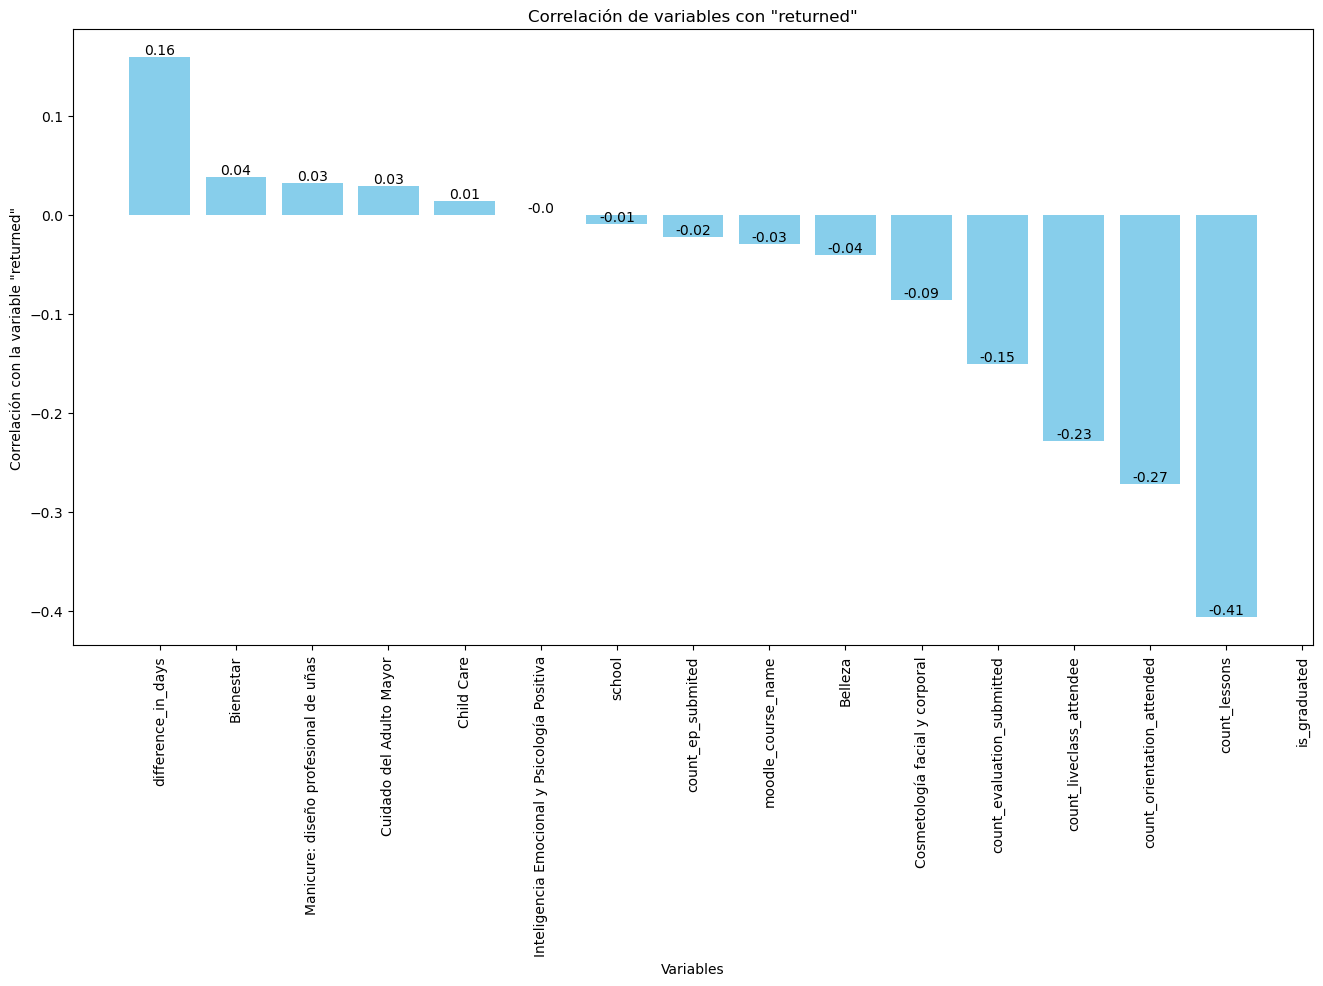

In [98]:
# Seleccionamos las variables
x = weekly_df.drop(columns = ['salesforce_contact_id', 'year_week', 'diff', 'learning_rate', 'returned'])
y = weekly_df['returned']

# Calculamos la correlación de Pearson para cada columna en x con respecto a y
correlations = {}
for column in x.columns:
    correlations[column] = np.corrcoef(x[column], y)[0, 1]

# Convertimos el diccionario de correlaciones en un DataFrame para facilitar la visualización
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])

# Ordenamos las correlaciones de mayor a menor
correlation_df = correlation_df.sort_values(by='correlation', ascending=False)

# Graficamos las correlaciones
plt.figure(figsize = (16, 8))
bars = plt.bar(correlation_df.index, correlation_df['correlation'], color = 'skyblue')

# Agregar los valores de las correlaciones encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha = 'center', va = 'bottom')

plt.xlabel('Variables')
plt.ylabel('Correlación con la variable "returned"')
plt.title('Correlación de variables con "returned"')
plt.xticks(rotation = 90)
plt.show()

# *BASKET*

In [42]:
basket_df = pd.read_csv('test_case_v1.csv')
basket_df = outliers_control(basket_df, id_col = 'salesforce_contact_id' , method = 'isolation_forest', contamination = 0.01)
basket_df.head()

,date,salesforce_contact_id,contact_created_date,is_free_trial_user__c,is_diplomado_user__c,first_primary_diplomado_id_fixed,first_primary_diplomado_name_fixed,first_primary_diplomado_school_fixed,moodle_course_id,moodle_course_name,school,count_orientation_attended,count_lessons,count_liveclass_attendee,count_evaluation_submitted,count_ep_submited,end_license_date,is_graduated
0,2024-03-09,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,907,Manicure: diseño profesional de uñas,Belleza,0,0,0,0,0,2023-01-06 17:15:48.000,0
1,2024-02-11,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,0,0,0,0,0,2023-01-06 17:15:48.000,0
2,2024-03-17,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,0,0,0,0,0,2023-01-06 17:15:48.000,0
3,2024-03-17,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,907,Manicure: diseño profesional de uñas,Belleza,0,0,0,0,0,2023-01-06 17:15:48.000,0
4,2024-02-11,0035G000020eEZiQAM,2022-01-06 17:15:48.000,False,True,1048,Inteligencia Emocional y Psicología Positiva,Bienestar,907,Manicure: diseño profesional de uñas,Belleza,0,0,0,0,0,2023-01-06 17:15:48.000,0


In [43]:
# Nos quedamos solamente con las variables de interés (usuario y curso)
basket_df = basket_df[['salesforce_contact_id', 'moodle_course_name']].drop_duplicates()
# creamos una matriz a partir de los valores anteriores
basket_matrix = basket_df.pivot_table(index = 'salesforce_contact_id', 
                                      columns = 'moodle_course_name', 
                                      aggfunc = 'size', 
                                      fill_value = 0)
# Nos quedamos sólo con aquellos casos donde se realizó más de un curso
basket_matrix['total'] = basket_matrix['Child Care'] + basket_matrix['Cosmetología facial y corporal'] + basket_matrix['Cuidado del Adulto Mayor'] + basket_matrix['Inteligencia Emocional y Psicología Positiva'] + basket_matrix['Manicure: diseño profesional de uñas']
basket_matrix = basket_matrix[basket_matrix['total'] > 1]
basket_matrix.drop(columns = 'total', inplace = True)
# convertimos los valores a binarios
basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0).astype(bool)
basket_matrix


moodle_course_name,Child Care,Cosmetología facial y corporal,Cuidado del Adulto Mayor,Inteligencia Emocional y Psicología Positiva,Manicure: diseño profesional de uñas
salesforce_contact_id,,,,,
0035G000020dLjuQAE,False,True,False,False,True
0035G000020dM65QAE,False,True,False,False,True
0035G000020dMLKQA2,False,True,False,False,True
0035G000020dMOAQA2,False,True,False,False,True
0035G000020dMRcQAM,False,True,False,False,True
...,...,...,...,...,...
003RN00000LdpGeYAJ,False,True,True,False,False
003RN00000LgtYuYAJ,False,True,False,True,False
003RN00000LhWoZYAV,True,False,False,True,False


In [44]:
# Calculamos los itemsets frecuentes
frequent_itemsets = apriori(basket_matrix, min_support = 0.1, use_colnames = True)
print(frequent_itemsets)
# Creamos las reglas de asociación
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values(by = 'support', ascending = False)

    support                                           itemsets
0  0.228057                                       (Child Care)
1  0.627532                   (Cosmetología facial y corporal)
2  0.325019                         (Cuidado del Adulto Mayor)
3  0.286384     (Inteligencia Emocional y Psicología Positiva)
4  0.586647             (Manicure: diseño profesional de uñas)
5  0.150600             (Child Care, Cuidado del Adulto Mayor)
6  0.538635  (Cosmetología facial y corporal, Manicure: dis...
7  0.148350  (Cuidado del Adulto Mayor, Inteligencia Emocio...


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Cosmetología facial y corporal),(Manicure: diseño profesional de uñas),0.627532,0.586647,0.538635,0.858338,1.463127,0.170495,2.917891,0.849823
3,(Manicure: diseño profesional de uñas),(Cosmetología facial y corporal),0.586647,0.627532,0.538635,0.918159,1.463127,0.170495,4.551095,0.765766
0,(Child Care),(Cuidado del Adulto Mayor),0.228057,0.325019,0.150600,0.660362,2.031765,0.076477,1.987354,0.657843
1,(Cuidado del Adulto Mayor),(Child Care),0.325019,0.228057,0.150600,0.463358,2.031765,0.076477,1.438470,0.752343
4,(Cuidado del Adulto Mayor),(Inteligencia Emocional y Psicología Positiva),0.325019,0.286384,0.148350,0.456434,1.593782,0.055269,1.312841,0.551959
5,(Inteligencia Emocional y Psicología Positiva),(Cuidado del Adulto Mayor),0.286384,0.325019,0.148350,0.518009,1.593782,0.055269,1.400403,0.522076


In [45]:
rules.sort_values(by = 'antecedents', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Child Care),(Cuidado del Adulto Mayor),0.228057,0.325019,0.150600,0.660362,2.031765,0.076477,1.987354,0.657843
1,(Cuidado del Adulto Mayor),(Child Care),0.325019,0.228057,0.150600,0.463358,2.031765,0.076477,1.438470,0.752343
2,(Cosmetología facial y corporal),(Manicure: diseño profesional de uñas),0.627532,0.586647,0.538635,0.858338,1.463127,0.170495,2.917891,0.849823
3,(Manicure: diseño profesional de uñas),(Cosmetología facial y corporal),0.586647,0.627532,0.538635,0.918159,1.463127,0.170495,4.551095,0.765766
4,(Cuidado del Adulto Mayor),(Inteligencia Emocional y Psicología Positiva),0.325019,0.286384,0.148350,0.456434,1.593782,0.055269,1.312841,0.551959
5,(Inteligencia Emocional y Psicología Positiva),(Cuidado del Adulto Mayor),0.286384,0.325019,0.148350,0.518009,1.593782,0.055269,1.400403,0.522076


In [46]:
df.columns

Index(['date', 'salesforce_contact_id', 'contact_created_date',
       'is_free_trial_user__c', 'is_diplomado_user__c',
       'first_primary_diplomado_id_fixed',
       'first_primary_diplomado_name_fixed',
       'first_primary_diplomado_school_fixed', 'moodle_course_id',
       'moodle_course_name', 'school', 'count_orientation_attended',
       'count_lessons', 'count_liveclass_attendee',
       'count_evaluation_submitted', 'count_ep_submited', 'end_license_date',
       'is_graduated', 'active_user', 'week', 'year', 'month', 'year_week',
       'difference_in_days', 'difference_in_weeks', 'learning_rate'],
      dtype='object')

In [47]:
df[['school', 'moodle_course_name']].drop_duplicates()

,school,moodle_course_name
71981,Bienestar,Cuidado del Adulto Mayor
72072,Belleza,Manicure: diseño profesional de uñas
72073,Bienestar,Child Care
72345,Belleza,Cosmetología facial y corporal
72527,Bienestar,Inteligencia Emocional y Psicología Positiva


# *CHURN*

In [48]:
df.columns

Index(['date', 'salesforce_contact_id', 'contact_created_date',
       'is_free_trial_user__c', 'is_diplomado_user__c',
       'first_primary_diplomado_id_fixed',
       'first_primary_diplomado_name_fixed',
       'first_primary_diplomado_school_fixed', 'moodle_course_id',
       'moodle_course_name', 'school', 'count_orientation_attended',
       'count_lessons', 'count_liveclass_attendee',
       'count_evaluation_submitted', 'count_ep_submited', 'end_license_date',
       'is_graduated', 'active_user', 'week', 'year', 'month', 'year_week',
       'difference_in_days', 'difference_in_weeks', 'learning_rate'],
      dtype='object')

In [49]:
# filtramos para el año en curso y creamos un subset para trabajar con el churn
churn_df = df[df['contact_created_date'] >= df['date'].min()]
# Nos quedamos sólo con aquellos usuarios que se haayan conectado, al menos, una vez
active_user = churn_df.groupby(['salesforce_contact_id'], as_index = False).agg({'learning_rate' : 'max'})
active_user.rename(columns = {'learning_rate' : 'is_active'}, inplace = True)
# agregamos al df de churn
churn_df = churn_df.groupby(['salesforce_contact_id', 'month'], as_index = False).agg({'learning_rate' : 'max'})
churn_df = churn_df.merge(active_user, on = 'salesforce_contact_id')
churn_df = churn_df[churn_df['is_active'] != 0]
churn_df = churn_df[['salesforce_contact_id', 'month', 'learning_rate', 'is_active']].drop_duplicates()
churn_df.sort_values(by = ['salesforce_contact_id', 'month'], ascending = True, inplace = True)
# calculamos la variación mes a mes
churn_df['diff'] = churn_df['learning_rate'].diff()
churn_df.fillna(0, inplace = True)
churn_df['diff'] = churn_df['diff'].astype('int')
# Definimos el churn
churn_df = churn_df[~((churn_df['learning_rate'] == 0) & (churn_df['diff'] == 0))]
churn_df.loc[churn_df['diff'] == -1, 'is_churn'] = 1
churn_df.loc[churn_df['is_churn'].isna(), 'is_churn'] = 0
churn_df['is_churn'] = churn_df['is_churn'].astype('int')

In [50]:
# filtramos el primer y úlitimo mes 
churn_df = churn_df[churn_df['month'] != 1] 
churn_df = churn_df[churn_df['month'] != 4]
churn_df.groupby('month').agg({'is_churn' : np.mean})

,is_churn
month,
2,0.348214
3,0.295664


In [51]:
# calculamos la cantidad de cursos por usuario
cursos_por_usuario = df[['salesforce_contact_id', 'moodle_course_name']].drop_duplicates()
cursos_por_usuario = cursos_por_usuario.groupby('salesforce_contact_id', as_index = False).agg({'moodle_course_name' : 'count'})
# calculamos la cantidad de escuelas por usuario
escuelas_por_usuario = df[['salesforce_contact_id', 'school']].drop_duplicates()
escuelas_por_usuario = escuelas_por_usuario.groupby('salesforce_contact_id', as_index = False).agg({'school' : 'count'})
# obtener dummies de variables cursos
one_hot_cursos = df[['salesforce_contact_id', 'moodle_course_name']].drop_duplicates()
one_hot_cursos = one_hot_cursos.pivot_table(index = 'salesforce_contact_id', 
                                      columns = 'moodle_course_name', 
                                      aggfunc = 'size', 
                                      fill_value = 0)
# calculamos la cantidad de escuelas por usuario
one_hot_escuelas = df[['salesforce_contact_id', 'school']].drop_duplicates()
one_hot_escuelas = one_hot_escuelas.pivot_table(index = 'salesforce_contact_id', 
                                      columns = 'school', 
                                      aggfunc = 'size', 
                                      fill_value = 0)

In [52]:
df.columns

Index(['date', 'salesforce_contact_id', 'contact_created_date',
       'is_free_trial_user__c', 'is_diplomado_user__c',
       'first_primary_diplomado_id_fixed',
       'first_primary_diplomado_name_fixed',
       'first_primary_diplomado_school_fixed', 'moodle_course_id',
       'moodle_course_name', 'school', 'count_orientation_attended',
       'count_lessons', 'count_liveclass_attendee',
       'count_evaluation_submitted', 'count_ep_submited', 'end_license_date',
       'is_graduated', 'active_user', 'week', 'year', 'month', 'year_week',
       'difference_in_days', 'difference_in_weeks', 'learning_rate'],
      dtype='object')

In [53]:
# filtramos para el año en curso y creamos un subset para trabajar con el churn
monthly_df = df[df['contact_created_date'] >= df['date'].min()]
# agregamos las variables de interés
monthly_df = monthly_df.groupby(['salesforce_contact_id', 'month'], as_index = False).agg({'count_orientation_attended' : 'sum',
                                                            'count_lessons' : 'sum', 
                                                            'count_liveclass_attendee' : 'sum',
                                                            'count_evaluation_submitted' : 'sum', 
                                                            'count_ep_submited' : 'sum',
                                                            'difference_in_days' : 'max',
                                                            'is_graduated' : 'max'})
# Mergeamos todos los datos
churn_df = churn_df.merge(monthly_df, on = ['salesforce_contact_id', 'month'], how = 'left')
churn_df = churn_df.merge(cursos_por_usuario, on = 'salesforce_contact_id', how = 'left')
churn_df = churn_df.merge(escuelas_por_usuario, on = 'salesforce_contact_id', how = 'left')
churn_df = churn_df.merge(one_hot_cursos, on = 'salesforce_contact_id', how = 'left')
churn_df = churn_df.merge(one_hot_escuelas, on = 'salesforce_contact_id', how = 'left')
# eliminamos las columnas no necesarias
churn_df.drop(columns = ['salesforce_contact_id', 'learning_rate', 'is_active', 'month', 'diff'], inplace = True)
# Verificamos las columnas
churn_df.columns


Index(['is_churn', 'count_orientation_attended', 'count_lessons',
       'count_liveclass_attendee', 'count_evaluation_submitted',
       'count_ep_submited', 'difference_in_days', 'is_graduated',
       'moodle_course_name', 'school', 'Child Care',
       'Cosmetología facial y corporal', 'Cuidado del Adulto Mayor',
       'Inteligencia Emocional y Psicología Positiva',
       'Manicure: diseño profesional de uñas', 'Belleza', 'Bienestar'],
      dtype='object')

In [54]:
# Escalamos variables del df
scaler = StandardScaler()
x_scaled = scaler.fit_transform(churn_df.drop('is_churn', axis=1))
# Definimos la variable dependiente
y = churn_df['is_churn']

# Creamos dos modelos para interpretar la importancia de las variables:
# Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(x_scaled, y)
# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_scaled, y)

# Importancia de las variables para cada modelo
logistic_importance = logistic_model.coef_[0]
random_forest_importance = random_forest_model.feature_importances_

feature_names = churn_df.drop('is_churn', axis=1).columns

logistic_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': logistic_importance})
random_forest_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': random_forest_importance})

logistic_importance_df = logistic_importance_df.sort_values(by='Importance', ascending=False)
random_forest_importance_df = random_forest_importance_df.sort_values(by='Importance', ascending=False)



print('Importancia de las variables para Regresión Logística: ')
logistic_importance_df

Importancia de las variables para Regresión Logística: 


,Feature,Importance
5,difference_in_days,1.480175
13,Manicure: diseño profesional de uñas,0.139937
9,Child Care,0.092627
11,Cuidado del Adulto Mayor,0.033209
14,Belleza,0.009343
6,is_graduated,0.000000
15,Bienestar,-0.016360
8,school,-0.030419
4,count_ep_submited,-0.064274
7,moodle_course_name,-0.125621


In [55]:
print("\nImportancia de las variables para Random Forest: ")
print(random_forest_importance_df)


Importancia de las variables para Random Forest: 
                                         Feature  Importance
1                                  count_lessons    0.665052
5                             difference_in_days    0.203287
0                     count_orientation_attended    0.053112
2                       count_liveclass_attendee    0.052093
3                     count_evaluation_submitted    0.017046
10                Cosmetología facial y corporal    0.003960
13          Manicure: diseño profesional de uñas    0.001536
7                             moodle_course_name    0.001397
12  Inteligencia Emocional y Psicología Positiva    0.000716
11                      Cuidado del Adulto Mayor    0.000517
9                                     Child Care    0.000509
14                                       Belleza    0.000320
8                                         school    0.000218
15                                     Bienestar    0.000215
4                              cou